In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
import random
import numpy as np
import pandas as pd
import mxnet as mx
import matplotlib.pyplot as plot

C:\Users\Default.DESKTOP-4MH8NDA\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
digi_train_df = pd.read_csv("train.csv")
digi_train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
digi_test_df = pd.read_csv("test.csv")
digi_test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(digi_train_df.shape, digi_test_df.shape)

(42000, 785) (28000, 784)


In [5]:
X = digi_train_df.iloc[:, 1:]
X.shape
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = digi_train_df.iloc[:, 0]
y.shape
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

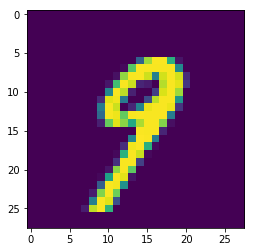

In [7]:
#Random Number Pick
for i in range(28):
    temp = X.values[i].reshape((28,28)).astype('uint8')
    temp.shape
plot.imshow(temp)
#temp.head()

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)>

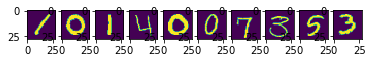

In [8]:
#PLotting Number 1 - 10 from Data
%matplotlib inline
for i in range(10):
    plot.subplot(1,10,i+1)
    plot.imshow(X.values[i].reshape((28,28)))
plot.imshow

2037


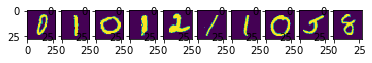

In [9]:
#Random Number Gen picking Random Number from Data
for i in range(10):
    temprandom = random.randint(1,5000)
    plot.subplot(1,10,i+1)
    plot.imshow(X.values[temprandom].reshape((28,28)))
plot.imshow
print(temprandom)

C:\Users\Default.DESKTOP-4MH8NDA\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


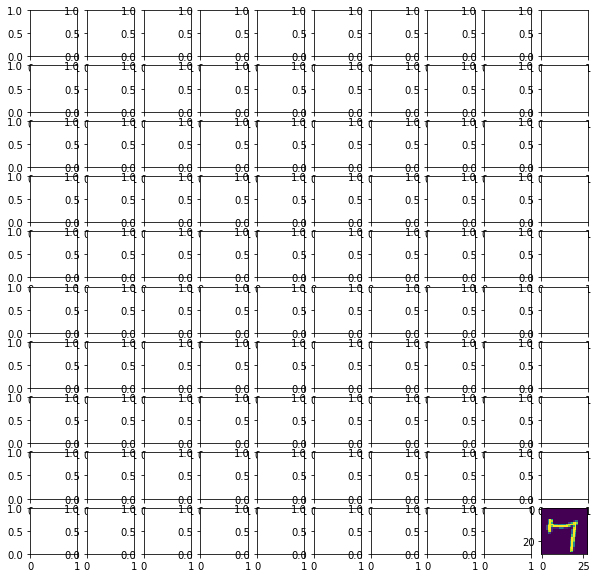

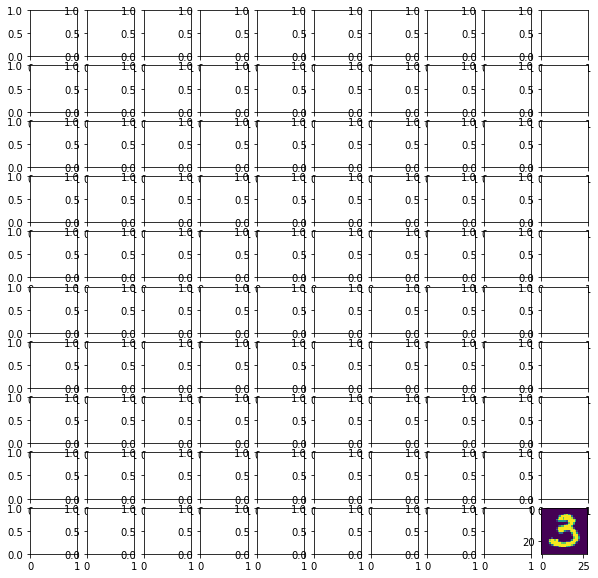

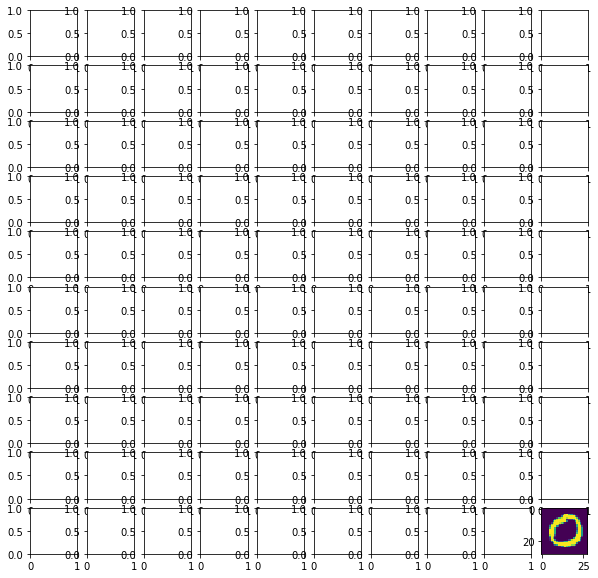

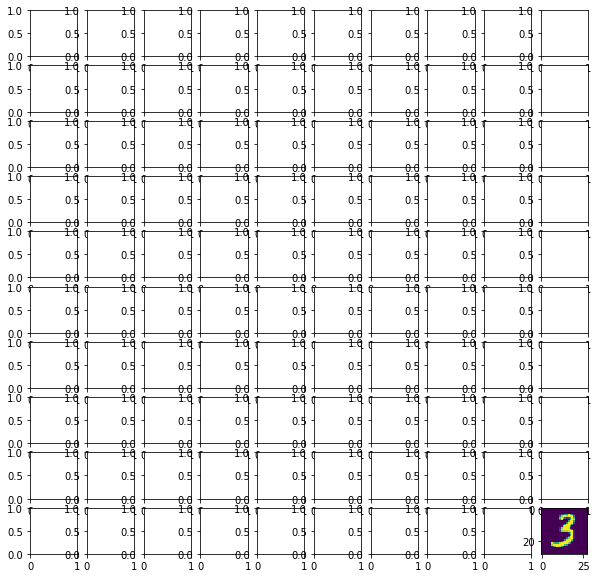

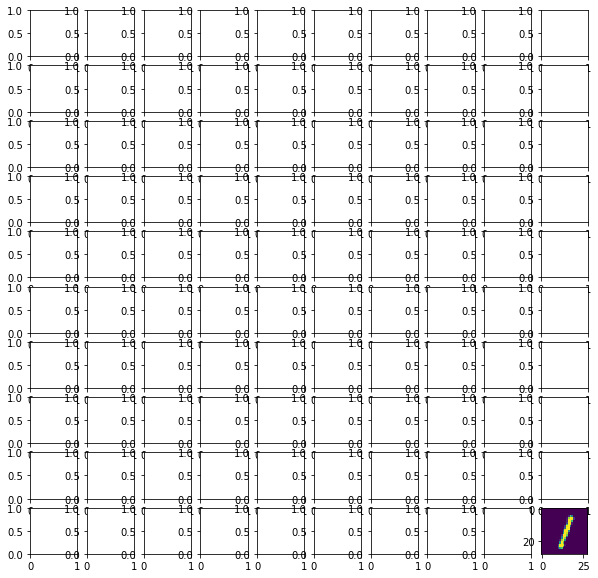

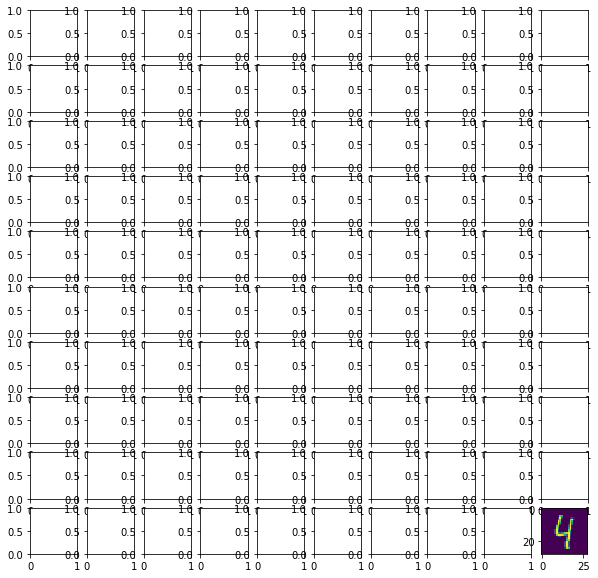

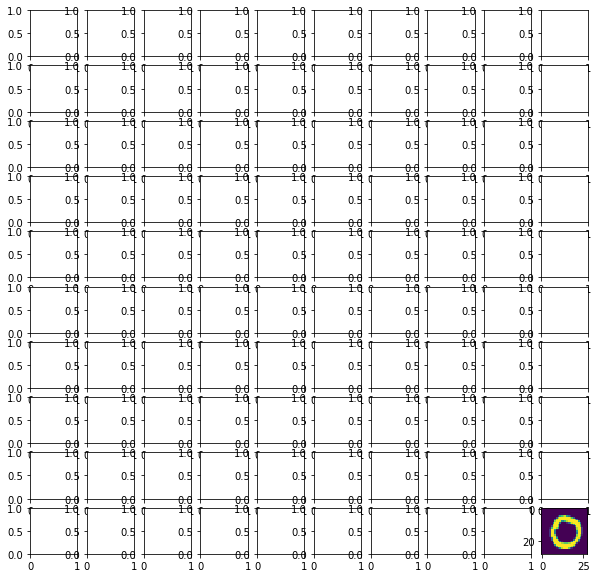

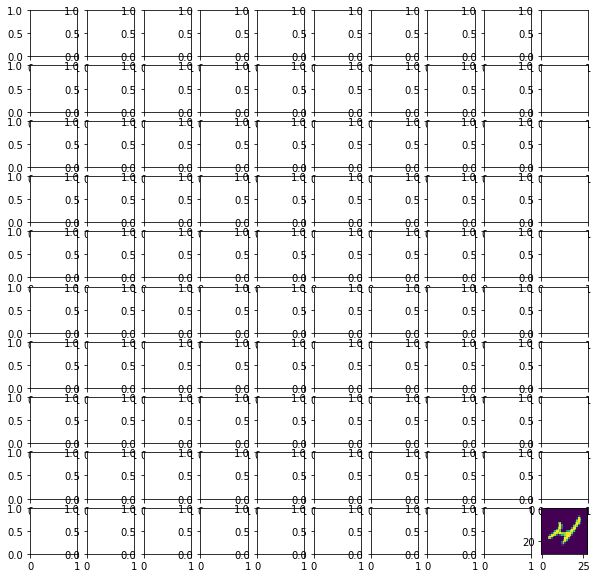

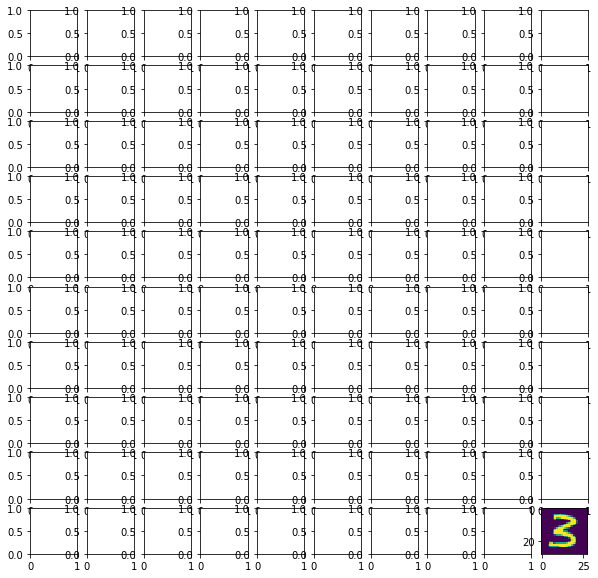

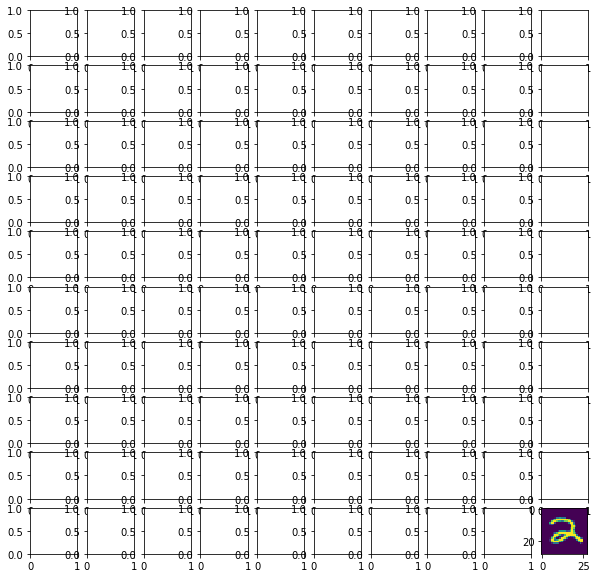

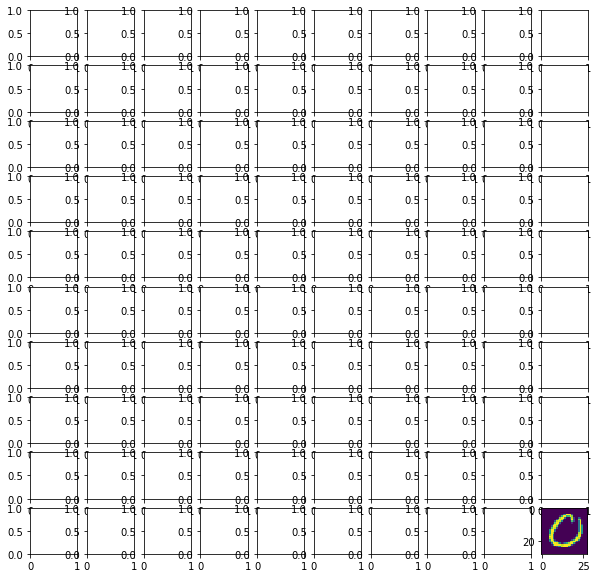

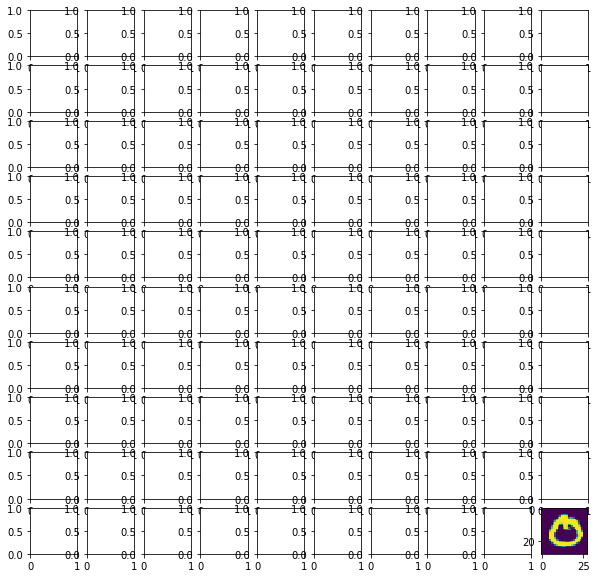

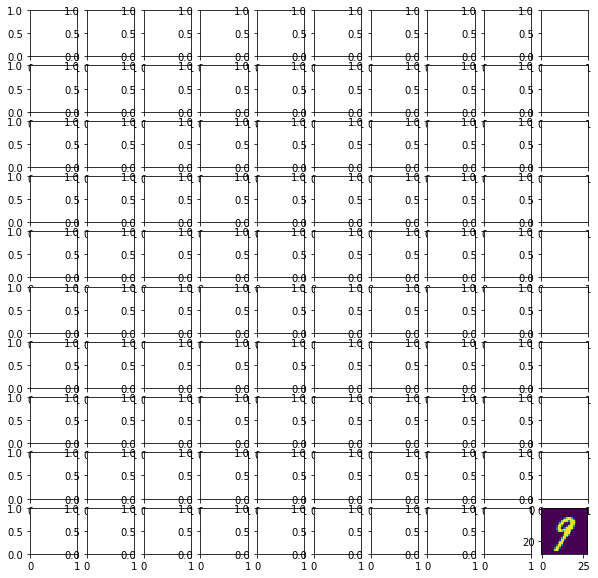

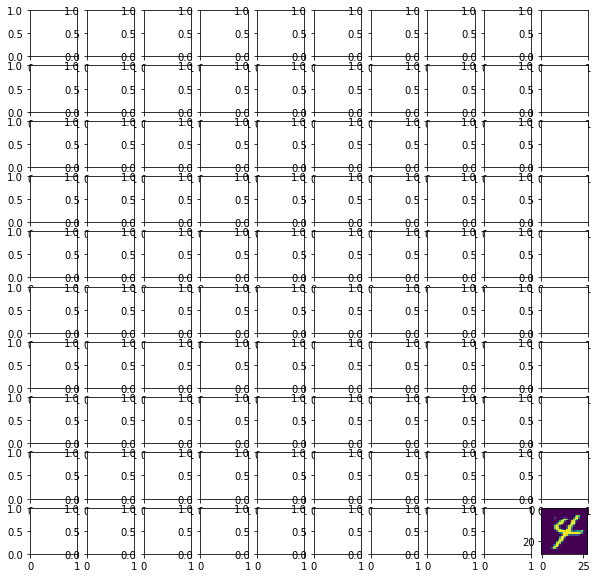

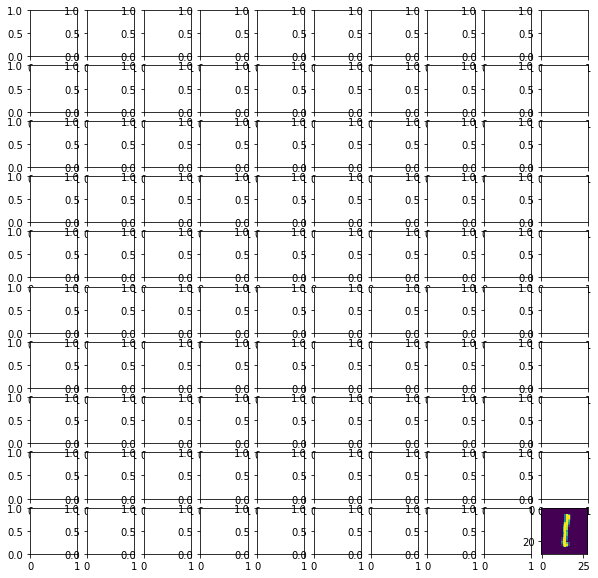

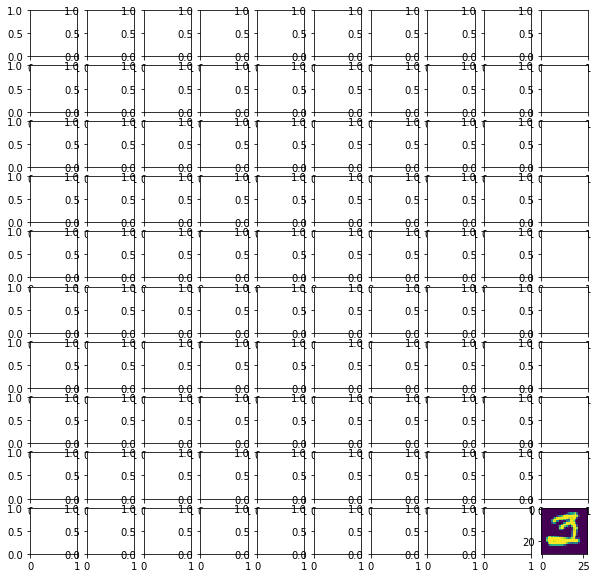

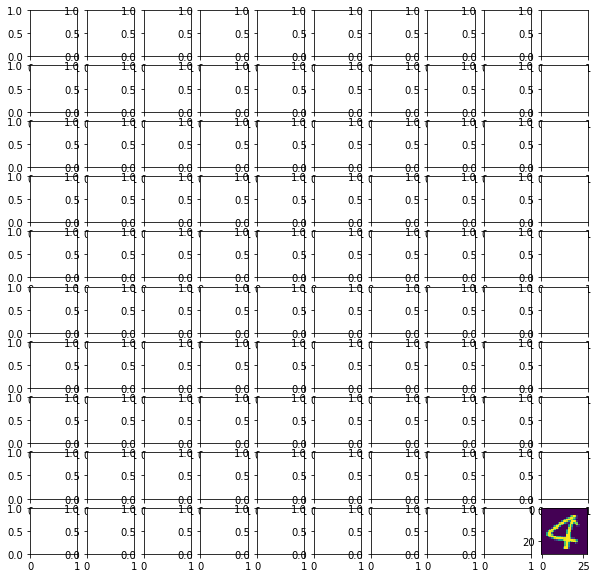

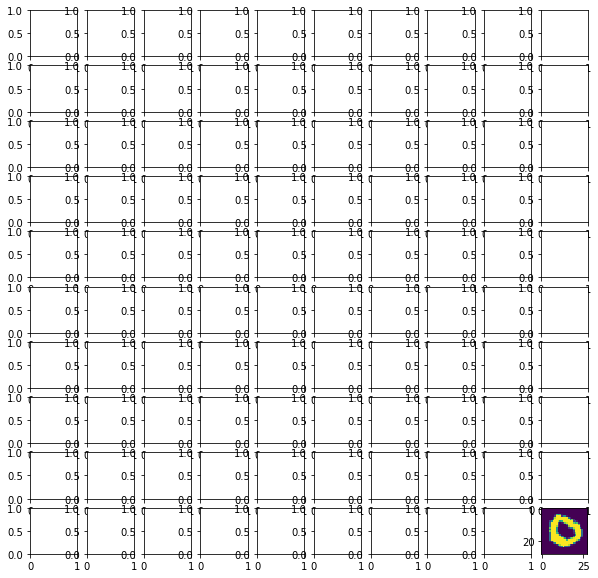

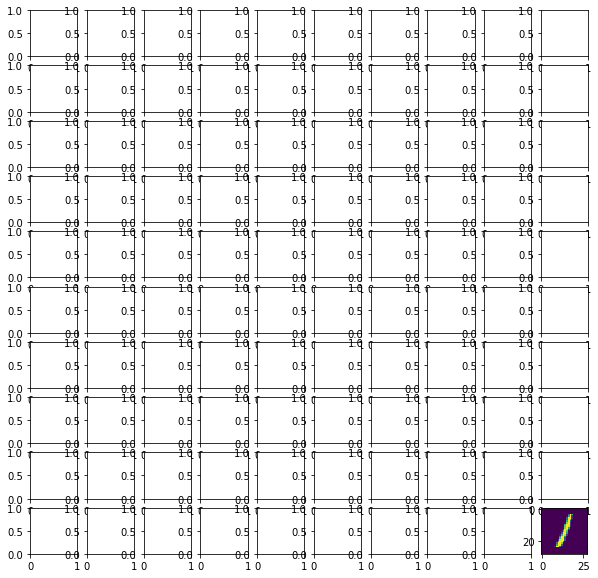

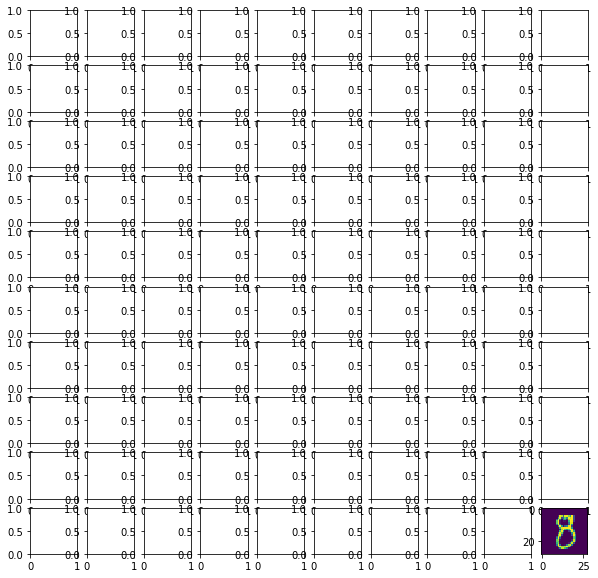

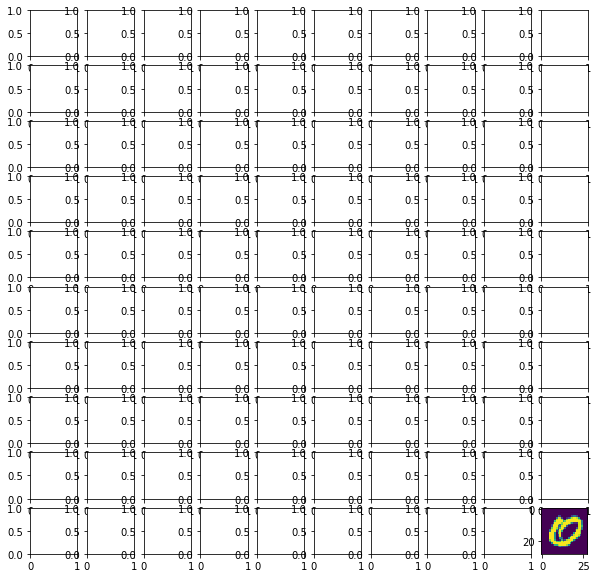

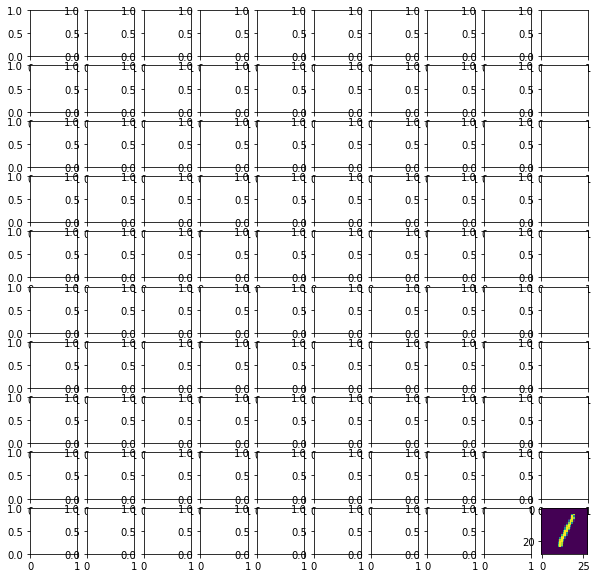

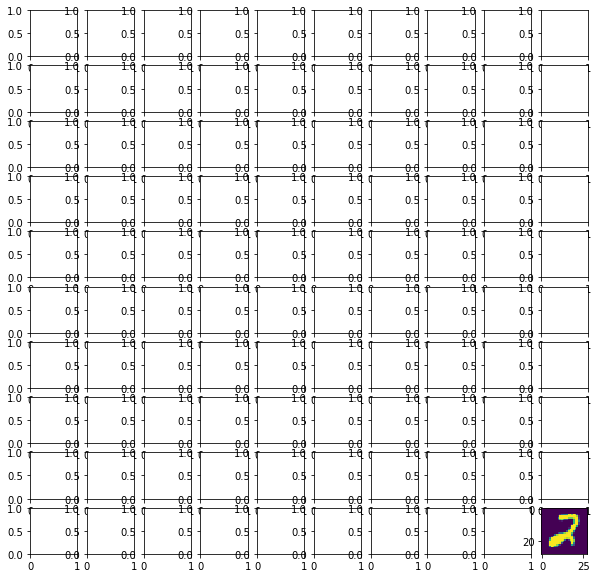

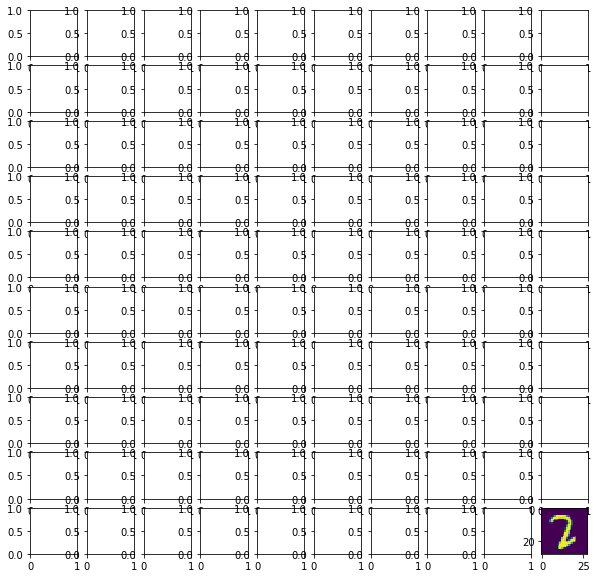

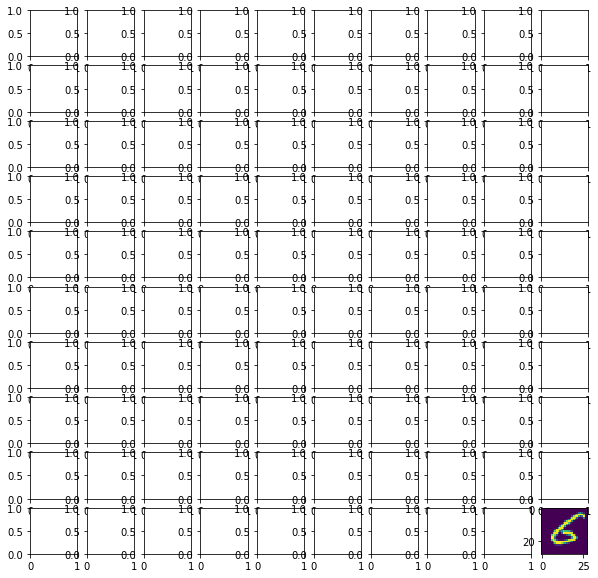

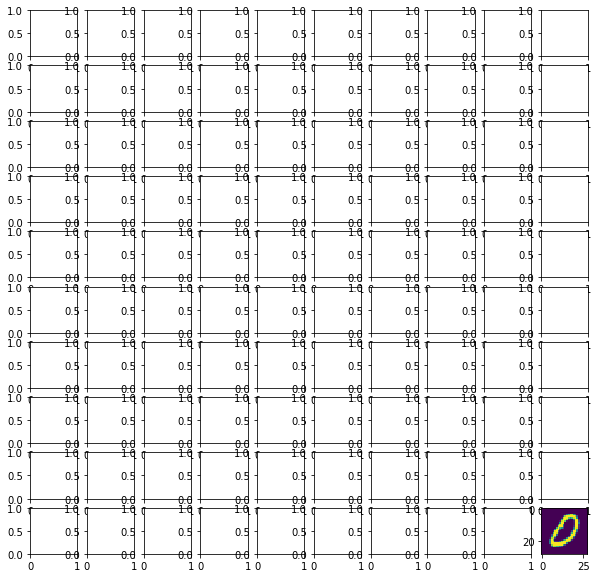

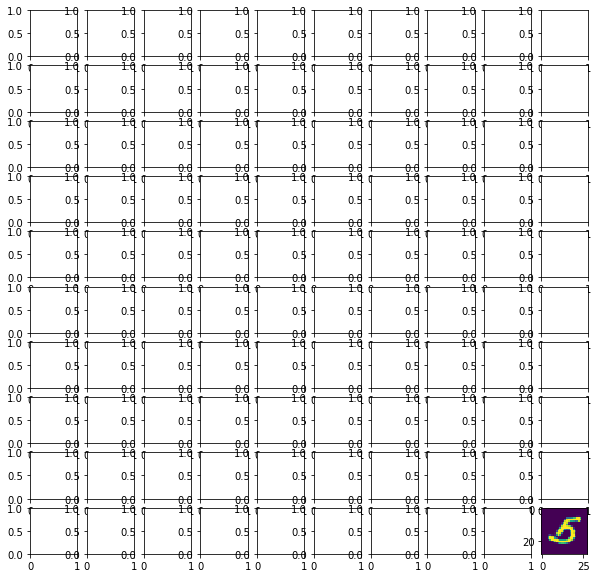

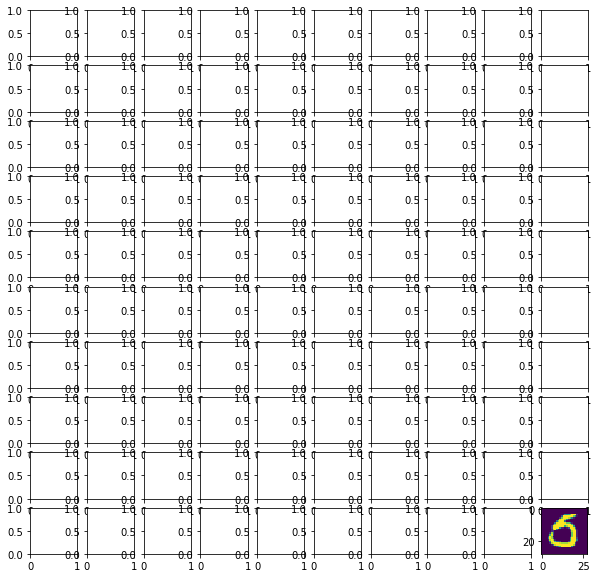

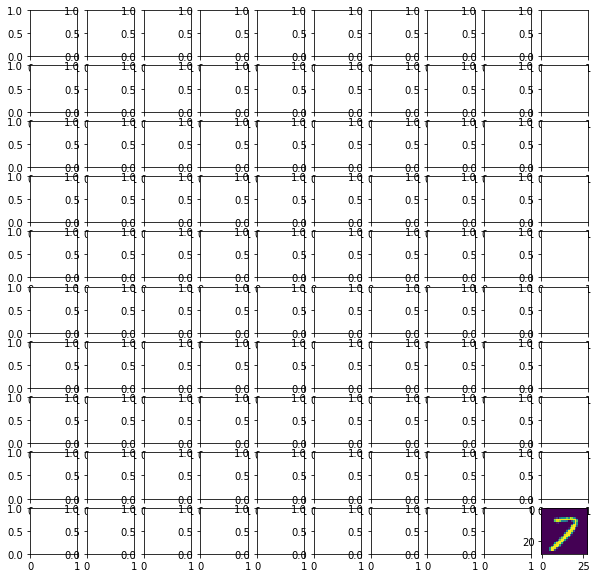

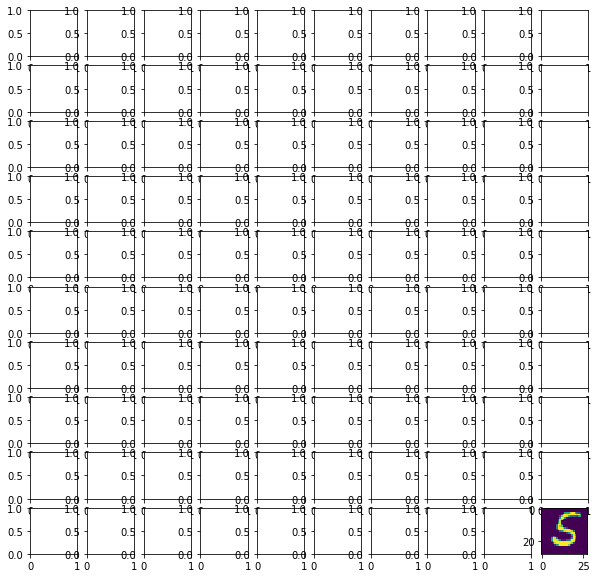

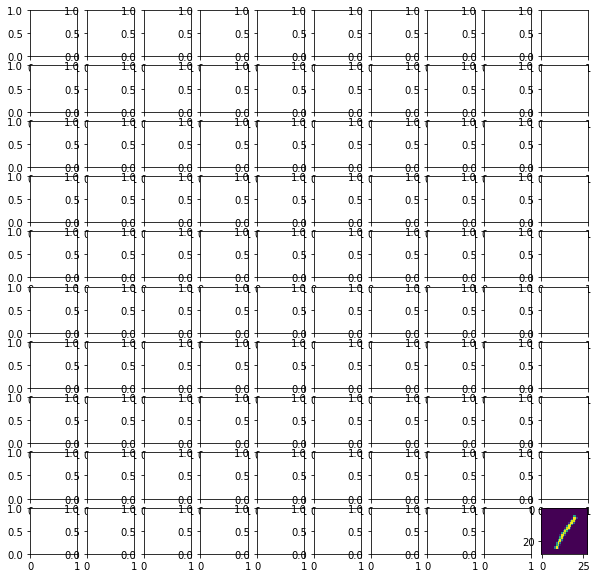

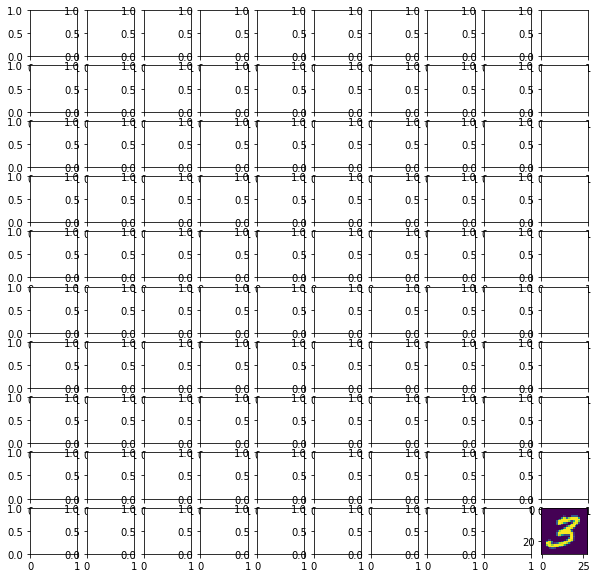

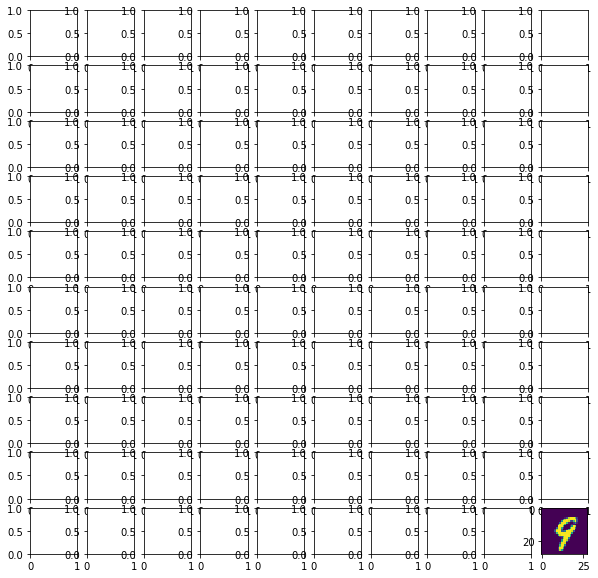

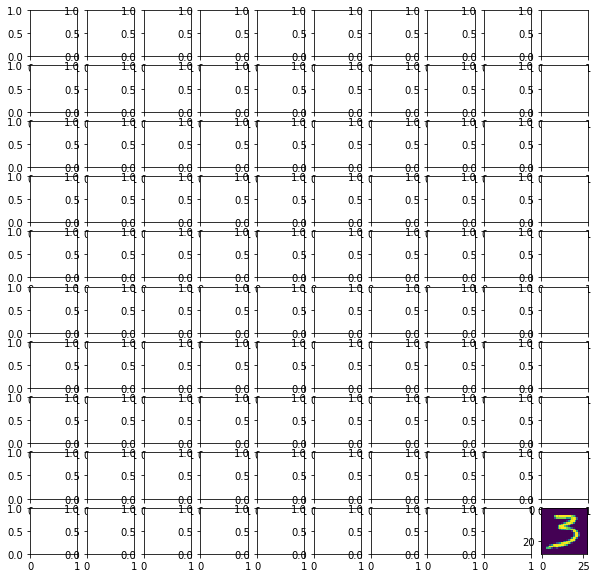

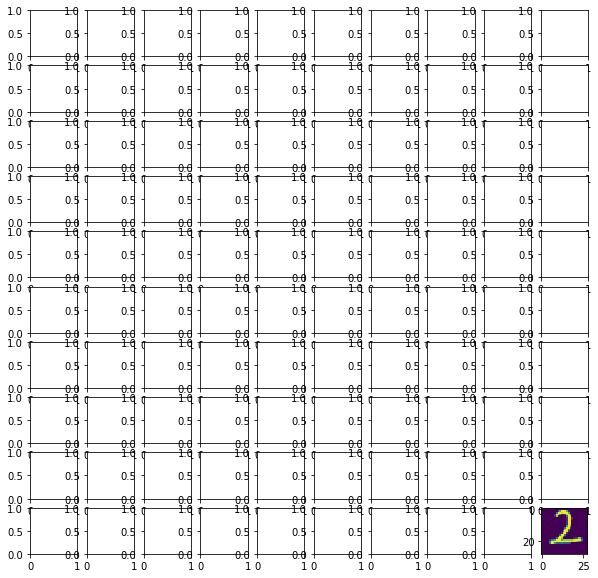

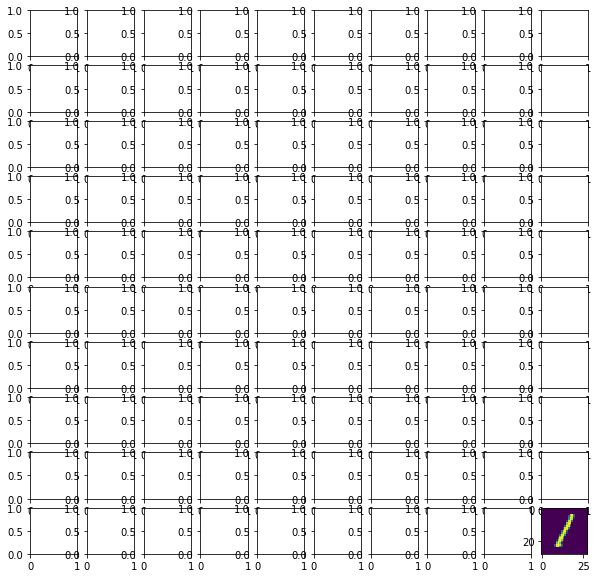

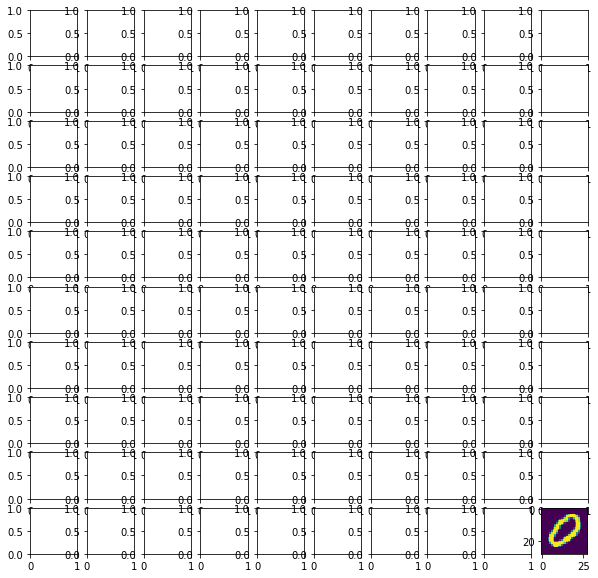

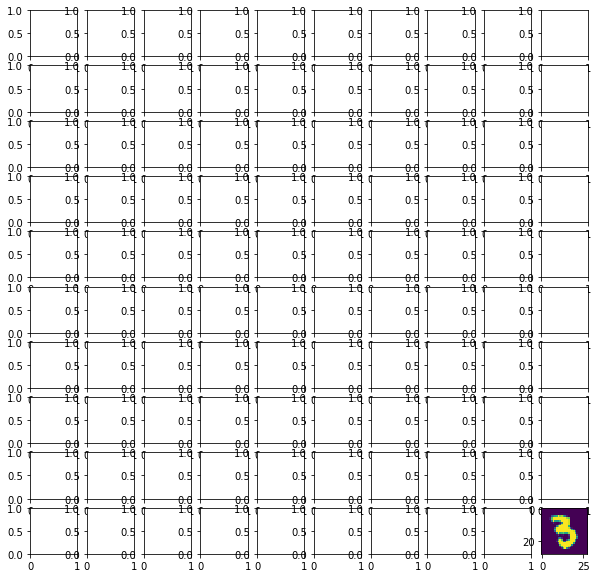

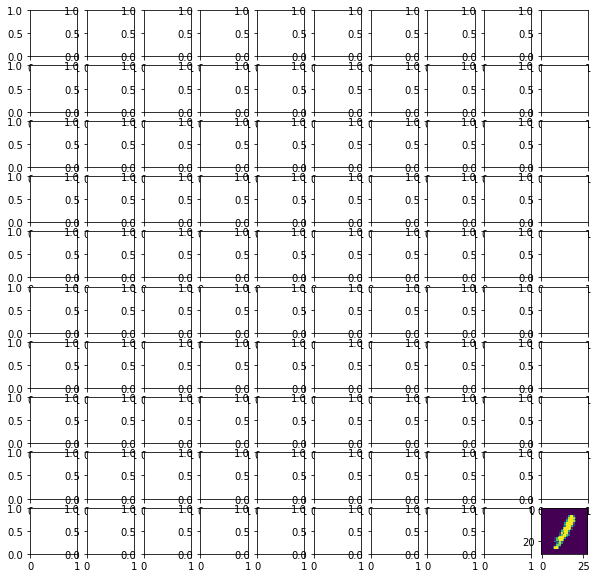

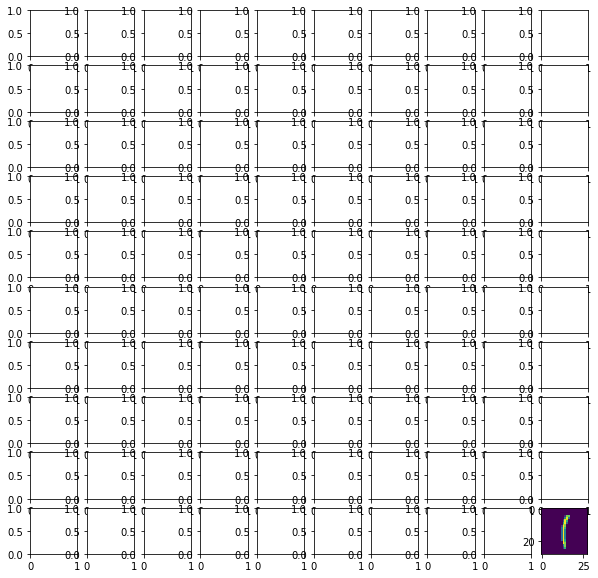

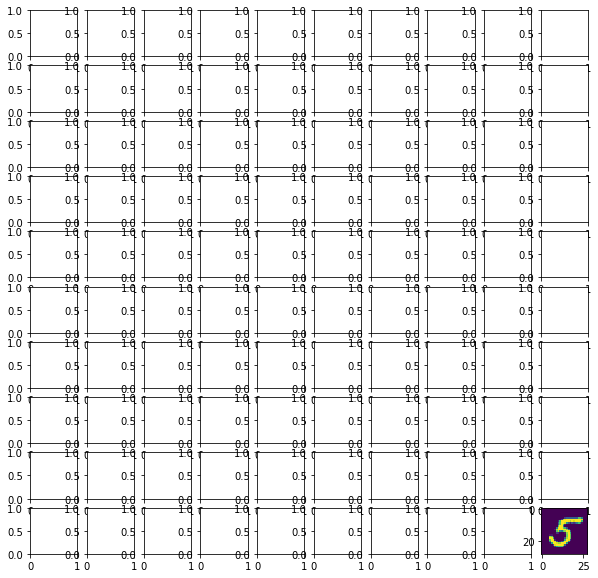

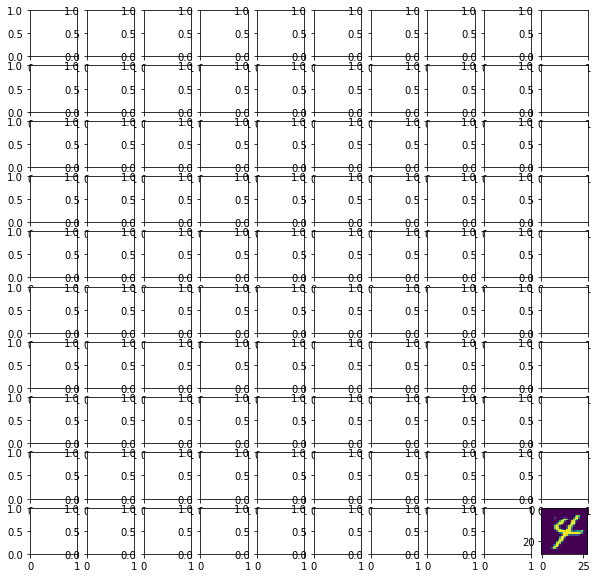

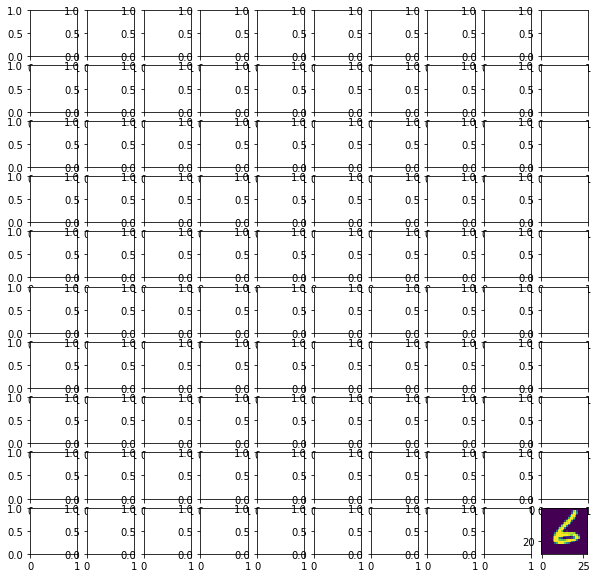

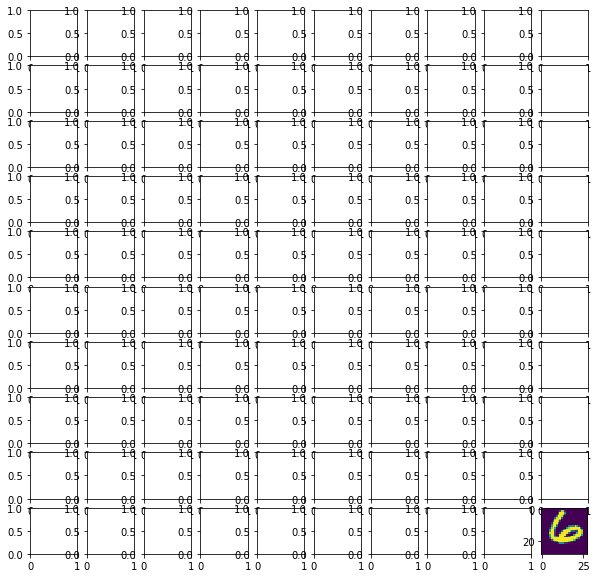

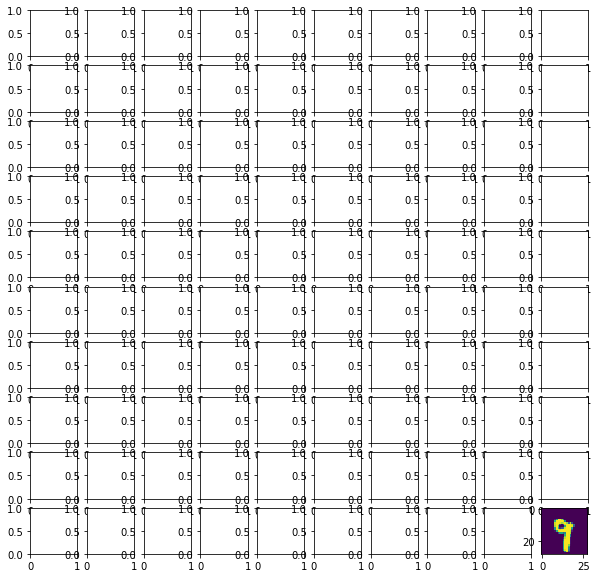

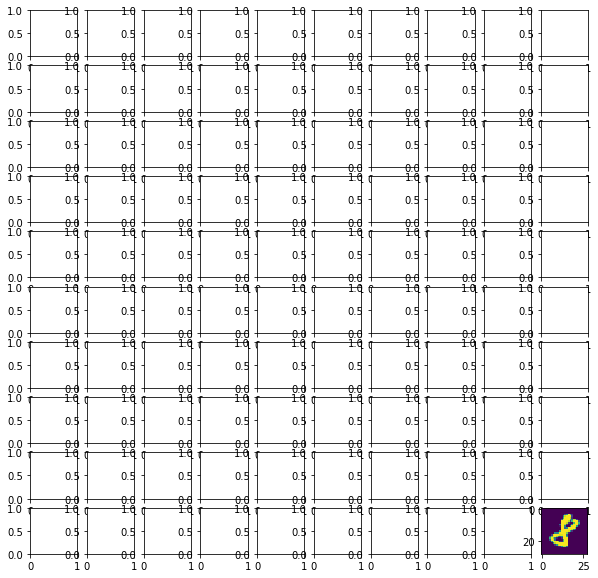

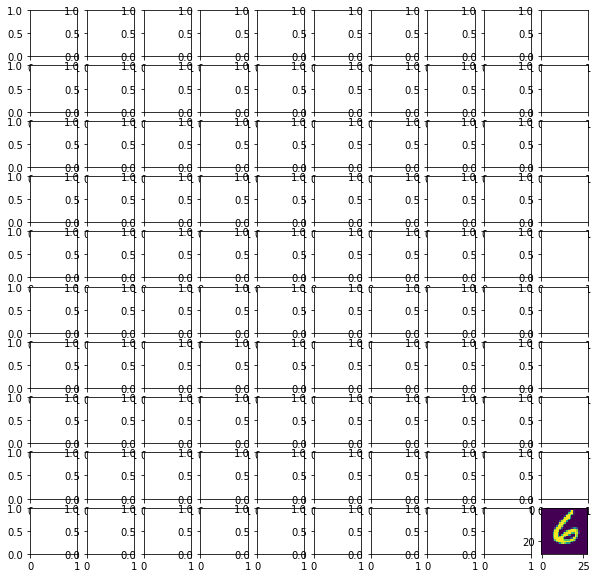

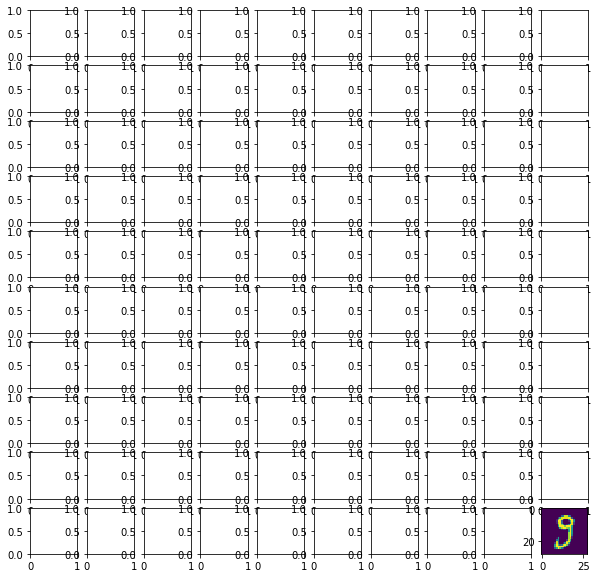

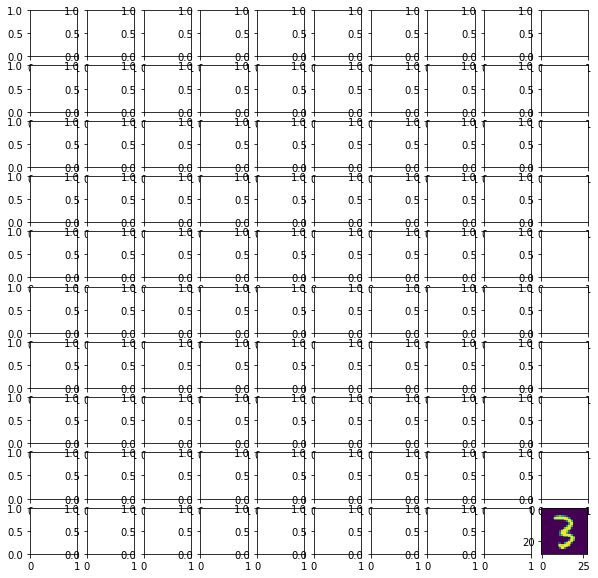

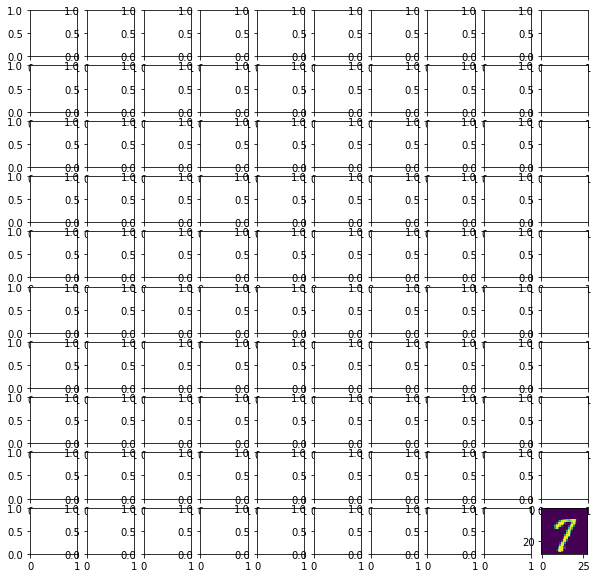

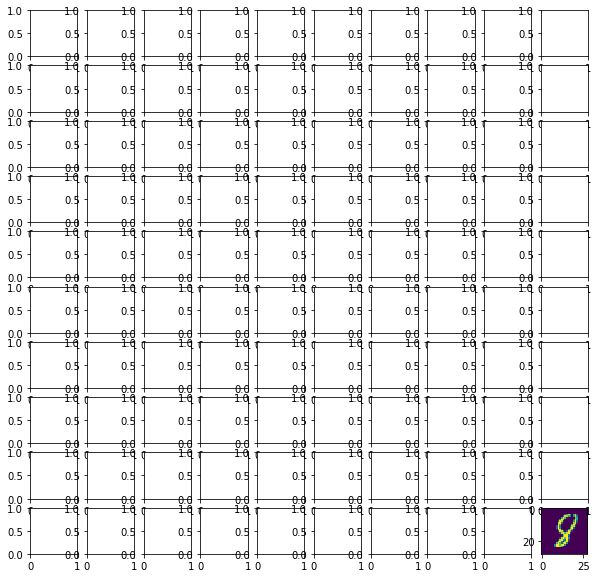

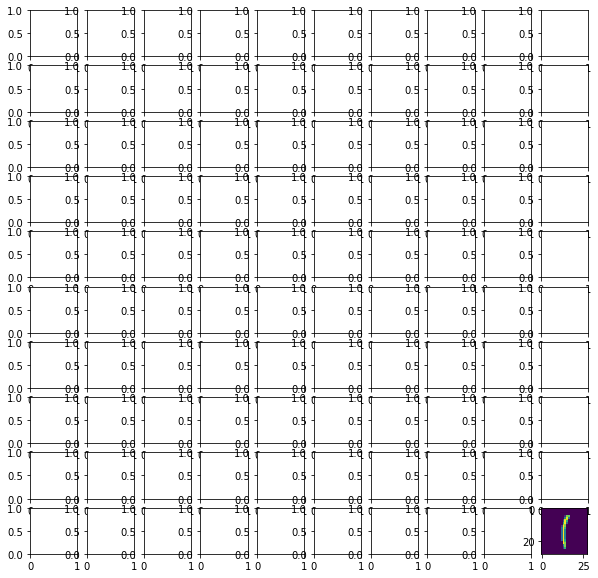

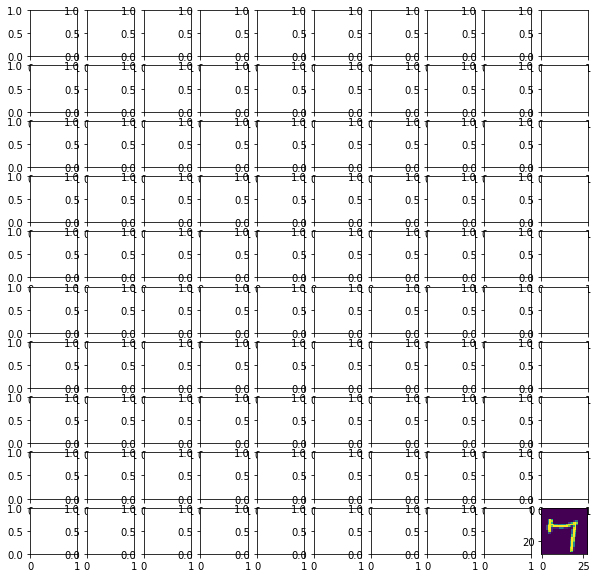

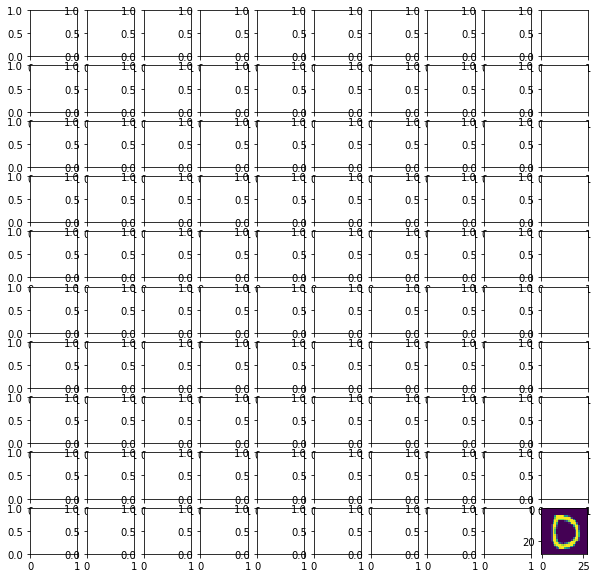

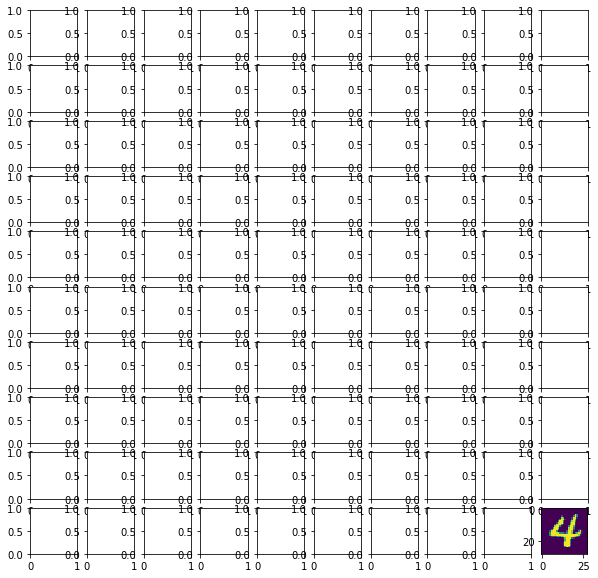

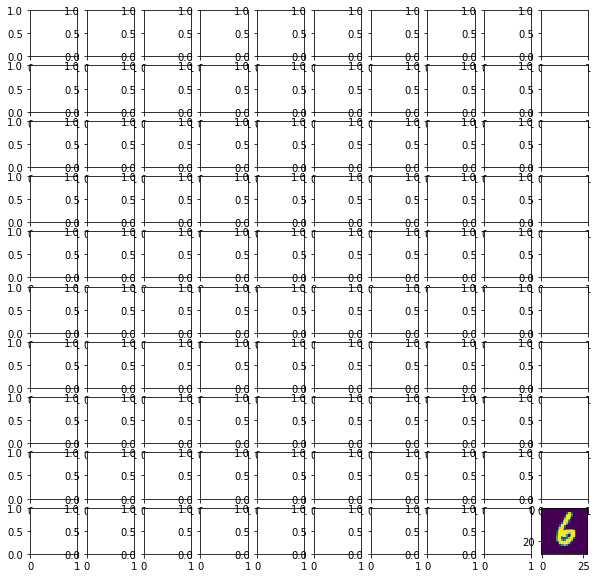

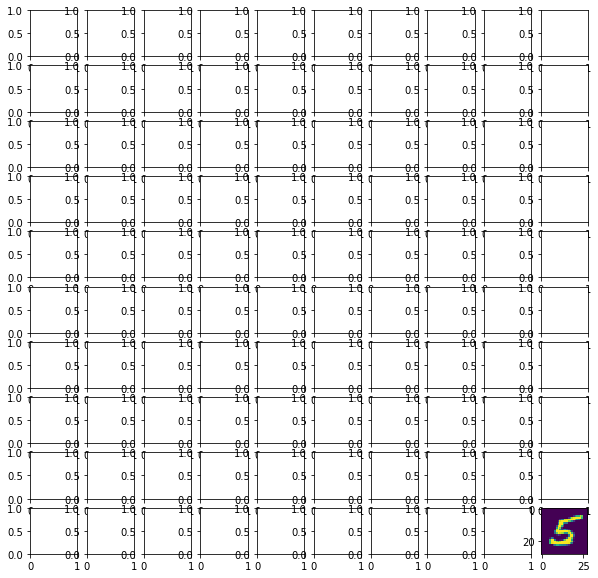

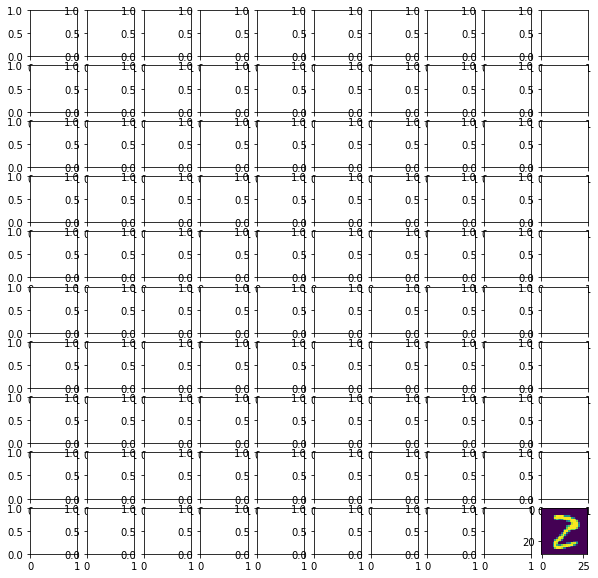

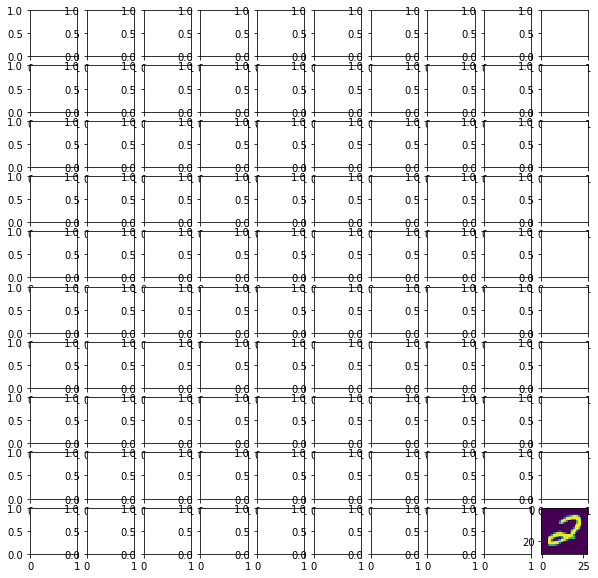

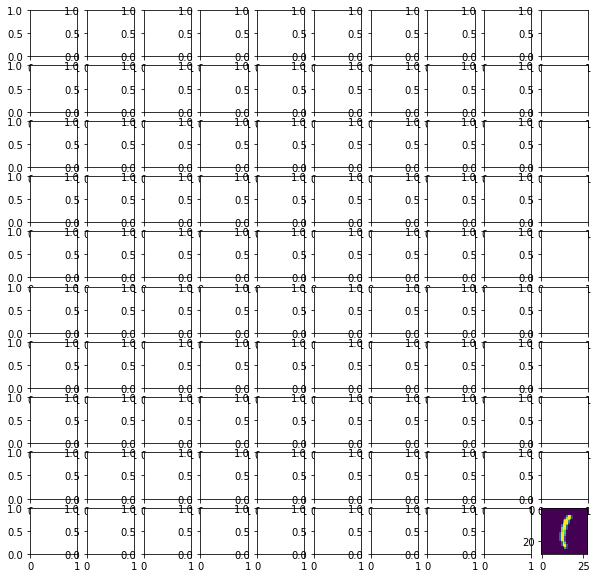

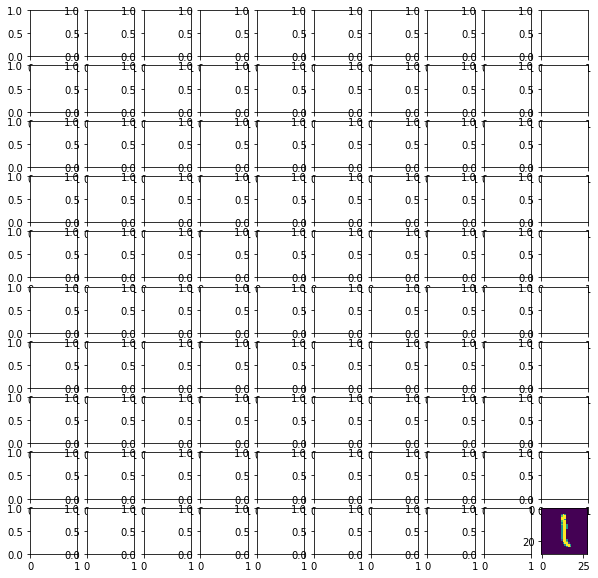

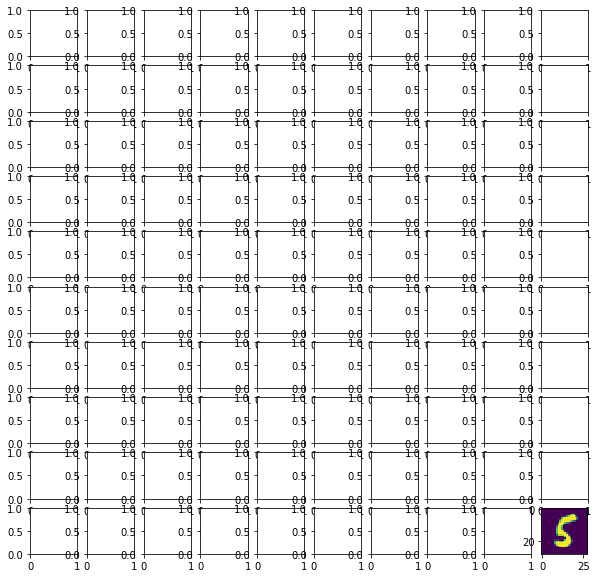

In [ ]:
#PLotting Number Data
#Not printing out an array on the digits some help
for i in range(10):
    for j in range(10):
        temprandom = random.randint(1,500)
        plot.subplots(10,10,figsize=(10,10))
        plot.imshow(X.values[temprandom].reshape((28,28)))
        plot.imshow 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
#Random-Forest estimators = 100
my_RandomForest = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state=3)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
print(y_predict)
print(y_test.values)
score = accuracy_score(y_test, y_predict)
print("Random Forest Accuracy: ",score)

[8 1 9 ... 5 5 0]
[8 1 9 ... 5 5 0]
 Random Forest Accuracy:  0.9612698412698413


In [12]:
#Random-Forest estimators = 700
my_RandomForest = RandomForestClassifier(n_estimators = 700, bootstrap = True)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
temp = y_test.values
counter = 0
print(y_predict)
print(y_test.values)
for i in range(len(y_predict)):
    if y_predict[i] == temp[i]:
        counter = counter + 1
print(counter)
score = accuracy_score(y_test, y_predict)
print("Random Forest Accuracy: ",score)

[8 1 9 ... 5 5 0]
[8 1 9 ... 5 5 0]
12148
 Random Forest Accuracy:  0.9641269841269842


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
#Random-Forest estimators = 20
my_RandomForest = RandomForestClassifier(n_estimators = 20, bootstrap = True,random_state=4)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
temp = y_test.values
counter = 0
print(y_predict)
print(y_test.values)
for i in range(len(y_predict)):
    if y_predict[i] == temp[i]:
        counter = counter + 1
print(counter)
score = accuracy_score(y_test, y_predict)
print("Random Forest Accuracy: ",score)

In [13]:
#Data Reset
digi_train_df = pd.read_csv("train.csv")
digi_test_df = pd.read_csv("test.csv")
X = digi_train_df.iloc[:, 1:]
y = digi_train_df.iloc[:, 0]

In [14]:
#K = 3 KNN Accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("KNN (with k=3) Accuracy: ",accuracy)

KNN (with k=3) Accuracy:  0.9676190476190476


In [15]:
#Decision Tree Randon State 5
my_decisiontree = DecisionTreeClassifier(random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
my_decisiontree.fit(X_train, y_train)
y_predict = my_decisiontree.predict(X_test)
score = accuracy_score(y_test, y_predict)
print("Decision Tree Randon State 5 Accuracy: ",score)

Decision Tree Randon State 5 Accuracy:  0.849047619047619


In [16]:
# Logistic Regression
my_logreg = LogisticRegression()
my_logreg.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
my_logreg.fit(X_train, y_train)
y_predict = my_logreg.predict(X_test)
score = accuracy_score(y_test, y_predict)
print("Logistic Regression Accuracy: ", score)

Logistic Regression Accuracy:  0.9045714285714286


In [25]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)
score_lr = accuracy_score(y_test, y_predict_lr)
print("Logistic Regression Predict: ", score_lr)

[4 4 6 ... 4 1 9]
Logistic Regression Predict:  0.9042857142857142


In [17]:
#Data Reset
digi_train_df = pd.read_csv("train.csv")
digi_test_df = pd.read_csv("test.csv")
X = digi_train_df.iloc[:, 1:]
preprocessing.scale(X)
y = digi_train_df.iloc[:, 0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=4)

In [32]:
#LinearRegression Use Linear Regression to train a linear model on the training set.
my_linreg = LinearRegression()
# fitting the model to the training data:
my_linreg.fit(X_train, y_train)
my_linreg.fit(X_test, y_test)
# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)
# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

2.9809358667647023
[ 1.91204458e+06 -9.13898498e+09  3.88921310e+10  1.18330667e+10
 -8.57887541e+10  1.44480730e+10  4.22726558e+09  1.21080895e+10
  1.08755632e+10 -3.18259802e+10 -2.22981550e+10  8.15270137e+09
 -5.44196325e+09  1.13135626e+10  1.75443768e+09  1.42954454e+10
  1.13925569e+08  2.53807207e+09 -4.09311195e+09  5.16933912e+08
 -3.54262626e+09 -3.31753544e+09  4.81369672e+09  1.74724384e+10
 -3.43805450e+09  1.07599315e+10  4.86713259e+09 -6.68168223e+08
 -9.49704154e+08 -6.37465797e+09 -1.52953817e+11  6.42129085e+09
  2.36915501e+09  3.76984483e-02  1.64273493e-02 -1.12736076e-02
  3.06337699e-03 -4.01281193e-03  1.37852132e-03  1.27790868e-03
 -3.96660715e-03  4.08133864e-03 -2.42136419e-03  5.86653501e-03
 -6.97464123e-03  5.45863714e-03  1.10275112e-03 -5.41629270e-04
 -1.23005360e-04  6.04852557e+07  4.51032111e+08  1.85903228e+09
 -1.94264461e+09 -2.62394410e+09 -1.66001313e+08 -5.73136844e+08
  3.34510131e+09  2.67158431e+09  1.41930699e+09  2.27055877e+09
 -2.55

In [40]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)
print("Linear Regression Predict: ", y_prediction)

Linear Regression Predict:  [3.12026625 4.7448453  4.76798334 ... 5.26330596 4.60750657 7.44564133]


In [21]:
#calculating and reporting the RMSE
#I dont think we need this one becasue the result is stupid high
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  852013702.8409007


In [27]:
#Cross-Validation to evaluate the regression performance
#I dont think we need this one 
X = digi_train_df.iloc[:, 1:]
y = digi_train_df.iloc[:, 0]
my_linreg = LinearRegression()
mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')

In [28]:
# using numpy sqrt function to calculate rmse:
#I dont think we need this one
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)

[5.67731092e+08 2.78031478e+06 1.93109479e+09 3.38726669e+08
 2.78374069e+10 2.53452882e+08 3.22380286e+08 4.85239996e+08
 3.42240135e+06 5.98480264e+08]


In [29]:
# calculate the average RMSE as final result of cross validation:
#I dont think we need this one becasue the result is stupid high
print("Final result of cross validation: ",rmse_list.mean())

Final result of cross validation:  3234071563.6237097
